<a href="https://colab.research.google.com/github/Da-Brian/3rd-lecture-makemoney/blob/main/%E7%94%BB%E5%83%8F%E7%94%9F%E6%88%90API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!pip install diffusers transformers ftfy accelerate

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionImg2ImgPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

# パイプラインの作成
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

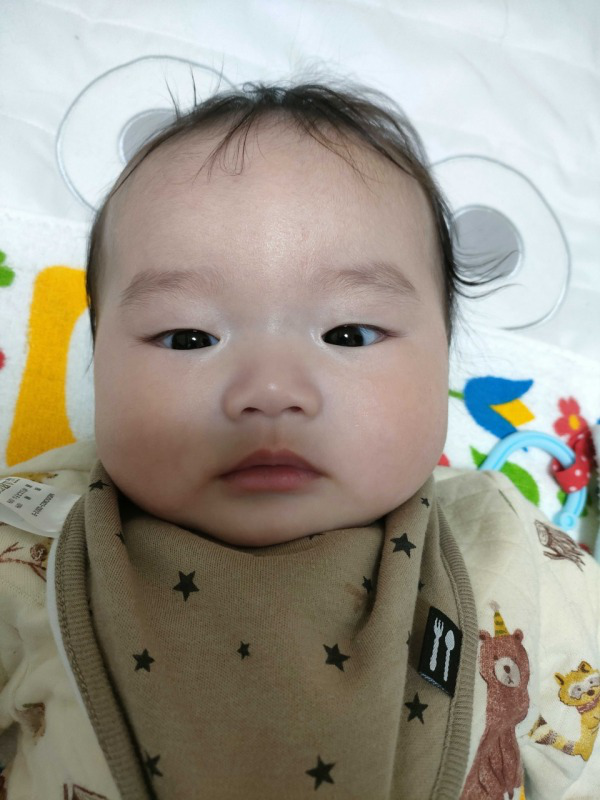

In [ ]:
from PIL import Image

# 入力画像の読み込み（適宜自分のパスに書き換える）
init_img = Image.open("/content/drive/MyDrive/Image/yukinobu2.jpg")
init_img

In [ ]:
# プロンプト
prompt = "the style of Gogh"

# パイプラインの実行
generator = torch.Generator(device).manual_seed(42) # 再現できるようにseedを設定
image = pipe(prompt, image=init_img, guidance_scale=7.5, strength=0.75, generator=generator).images[0]  

# 変換した画像の保存
image.save("yukinobu_gogh.png")

  0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')